In [1]:
import sentiment_mod as s

print(s.sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(s.sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))

('pos', 1.0)
('neg', 1.0)


In [8]:
import tweepy


# Step 1 - Authenticate
consumer_key='ZSw1btZ0hSDqUa5Rb5AK4Mrik'
consumer_secret='SvjAFiBXXZUpxZyhoBmsK4XbZQOzj7T4WLtBAhZrSniq39i4YG'

access_token='815156608716206080-zwpRzb3vuGVSEGjd7NssXjmI2PVgTju'

access_token_secret='V8r59n4EYYdzHlx9Ggqpy9zVy9AmVZcmOlKMSlraEPbvo'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.search('Trump',count=200)
for tweet in public_tweets:
    twee=tweet.text
    sentiment_value, confidence = s.sentiment(twee)
    print(twee, sentiment_value, confidence)
    if confidence*100 >= 80:
            output = open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()



RT @MSNBC: "To have the president invite him for a summit at the White House when Ukraine is still invaded and partly occupied is just goin… pos 0.6
@MissouriGOP @clairecmc So funny Missourians consider Claire a radical Dem. Look at her voting record. 🙈

And FYI..… https://t.co/jI8IxZxWvd pos 0.6
RT @waltshaub: I’ve been saying for months that the frequent puff pieces about Conway and McGahn, often at Trump’s expense, would have me s… neg 1.0
@kylegriffin1 Can we get rid of trump the same way...please neg 1.0
RT @CNN: White House confirms President Trump and Russian President Vladimir Putin discussed the possibility of meeting at the White House… neg 0.6
@CurtisHouck @ananavarro @CNN Navarro is promoting her brand.  Anti-Trump. neg 1.0
President Trump has invited Putin to the White House, Kremlin says https://t.co/KrnbrCcOBx neg 1.0
RT @ET2U: @whca @maggieNYT Did Trump choose the winner?! neg 1.0
RT @nytimes: China just hit back at President Trump’s tariffs on steel and aluminum. The c

RT @TomSteyer: Mr. Trump's daily corruption costs the American taxpayer. He is using the Presidency to make money for himself and his famil… neg 0.6
RT @EdKrassen: With today's tweets about Amazon and Sinclair Broadcasting, President Trump has told the country that he doesn't determine s… neg 1.0
RT @GeorgeTakei: Painfully accurate. https://t.co/MMzR31lTy1 neg 0.8
@gloriawoody4 They're a corrupt GOP-Lite.  Light years better than Trump, but that's not saying much. neg 1.0
Trump Administration Backs PLO In Victims’ High Court Appeal -  - See More @ https://t.co/UjvOW503oJ neg 0.8
RT @chaz1944: Sinclair Broadcasting Under Fire for Outrageous Trump Propaganda Script @alternet https://t.co/73fTmNUg9u neg 0.8
RT @EdKrassen: Before the Stock market opened this morning, I said I expected the Dow Jones to fall over 1000 points today after Trump made… neg 1.0
RT @DavidRomeiPHD: #Trump and #JohnBolton want a #war with #Iran to placate #Israel and to bring America down into the gutter of defeat.


252


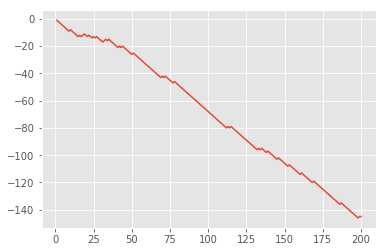

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')
    print(len(lines))
    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()